<a href="https://colab.research.google.com/github/AI4Finance-LLC/FinRL-Library/blob/master/FinRL_stock_trading_NeurIPS_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Reinforcement Learning for Stock Trading from Scratch: Multiple Stock Trading

Tutorials to use OpenAI DRL to trade multiple stocks in one Jupyter Notebook | Presented at NeurIPS 2020: Deep RL Workshop

* This blog uses FinRL to reproduce the paper: Practical Deep Reinforcement Learning Approach for Stock Trading, Workshop on Challenges and Opportunities for AI in Financial Services, NeurIPS 2018.
* Check out medium blog for detailed explanations: https://towardsdatascience.com/finrl-for-quantitative-finance-tutorial-for-multiple-stock-trading-7b00763b7530
* Please report any issues to our Github: https://github.com/AI4Finance-LLC/FinRL-Library/issues
* **Pytorch Version** 



# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training and Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A includes three actions: a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {−k, ..., −1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [1]:
## install finrl library
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git 'C:\Users\User\AppData\Local\Temp\pip-req-build-mwwbxx1r'
  Running command git clone -q https://github.com/quantopian/pyfolio.git 'C:\Users\User\AppData\Local\Temp\pip-install-nv2ypccs\pyfolio_ad819aacd1a04de490a11f0bc98583c8'
ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'D:\\InstalledSoftware\\anaconda3\\envs\\python-notebook\\Lib\\site-packages\\cv2\\cv2.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to c:\users\user\appdata\local\temp\pip-req-build-mwwbxx1r
  Cloning https://github.com/quantopian/pyfolio.git to c:\users\user\appdata\local\temp\pip-install-nv2ypccs\pyfolio_ad819aacd1a04de490a11f0bc98583c8
  Using cached stockstats-0.3.2-py2.py3-none-any.whl (13 kB)
  Using cached yfinance-0.1.59.tar.gz (25 kB)
  Using cached stable_baselines3-1.0-py3-none-any.whl (152 kB)
  Using cached int_date-0.1.8-py2.py3-none-any.whl (5.0 kB)
  Using cached multitasking-0.0.9.tar.gz (8.1 kB)
  Created wheel for finrl: filename=finrl-0.3.0-py3-none-any.whl size=38613 sha256=3ccf134adc24d48a9065db8565c2bb837b3e8b53677ad20b95d16a848df211f9
  Stored in directory: C:\Users\User\AppData\Local\Temp\pip-ephem-wheel-cache-713fwcwc\wheels\e8\19\74\11261997d6bdca44ba73e8eeedb94a3e3d340259516a0887eb
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=76260 sha256=8e97991000c289f87defd8fb45d928c8f15ff5a61bb8086


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them. 
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [8]:
!pip install yfinance
!pip install stockstats
!pip install pyfolio
!pip install gym

  Using cached empyrical-0.5.5-py3-none-any.whl
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88681 sha256=886e210cbcecd29e2f020b9273be5ae2a55c524fdc4f55932beccc03daf06864
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\42\16\92\9c9d49efccc497040268960f0825101cc9b1c6e41cdc5a409e
Successfully built pyfolio


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config import config
from finrl.marketdata.yahoodownloader import YahooDownloader
from finrl.preprocessing.preprocessors import FeatureEngineer
from finrl.preprocessing.data import data_split
from finrl.env.env_stocktrading import StockTradingEnv
from finrl.model.models import DRLAgent
from finrl.trade.backtest import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


<a id='1.4'></a>
## 2.4. Create Folders

In [2]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [3]:
# from config.py start_date is a string
config.START_DATE

'2000-01-01'

In [4]:
# from config.py end_date is a string
config.END_DATE

'2021-01-01'

In [5]:
print(config.SP500_20_TICKER)

['AAPL', 'MSFT', 'AMZN', 'BRK-B', 'JPM', 'JNJ', 'UNH', 'HD', 'PG', 'NVDA', 'DIS', 'BAC', 'CMCSA', 'XOM', 'VZ', 'T', 'ADBE', 'PFE', 'CSCO', 'INTC']


In [6]:
sp500_20_df = YahooDownloader(start_date = config.START_DATE,
                     end_date = config.END_DATE,
                     ticker_list = config.SP500_20_TICKER).fetch_data()

sp_df = YahooDownloader(start_date = config.START_DATE,
                     end_date = config.END_DATE,
                     ticker_list = config.SP500_TICKER).fetch_data()

nas_20_df = YahooDownloader(start_date = config.START_DATE,
                     end_date = config.END_DATE,
                     ticker_list = config.NAS_20_TICKER).fetch_data()
qqq_df = YahooDownloader(start_date = config.START_DATE,
                     end_date = config.END_DATE,
                     ticker_list = config.QQQ_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
df = pd.concat([sp500_20_df, sp_df], ignore_index=True) #combination 1

In [8]:
df.sort_values(['date','tic'],ignore_index=True).head(43)

,date,open,high,low,close,volume,tic,day
0,2000-01-03,0.936384,1.004464,0.907924,0.859423,535796800.0,AAPL,0
1,2000-01-03,16.812500,16.875000,16.062500,16.274673,7384400.0,ADBE,0
2,2000-01-03,81.500000,89.562500,79.046875,89.375000,16117600.0,AMZN,0
3,2000-01-03,25.125000,25.125000,24.000000,13.952057,13705800.0,BAC,0
4,2000-01-03,36.500000,36.580002,34.820000,35.299999,875000.0,BRK-B,0
5,2000-01-03,16.145832,16.333332,15.062500,12.189544,2333700.0,CMCSA,0
6,2000-01-03,54.968750,55.125000,51.781250,40.118656,53076000.0,CSCO,0
7,2000-01-03,28.855125,29.533344,28.361876,23.115248,8402230.0,DIS,0
8,2000-01-03,68.625000,69.187500,63.812500,42.563168,12030800.0,HD,0
9,2000-01-03,41.632812,43.687500,41.625000,27.002798,57710200.0,INTC,0


# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [9]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = config.TECHNICAL_INDICATORS_LIST,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
Successfully added turbulence index


In [10]:
processed.shape
processed.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,...,cci_10,cci_20,dx_30,close_20_sma,close_60_sma,close_120_sma,close_20_ema,close_60_ema,close_120_ema,turbulence
0,2000-01-03,0.936384,1.004464,0.907924,0.859423,535796800.0,AAPL,0,0.0,0.925665,...,-66.666667,-66.666667,100.0,0.859423,0.859423,0.859423,0.859423,0.859423,0.859423,0.0
1,2000-01-03,16.812500,16.875000,16.062500,16.274673,7384400.0,ADBE,0,0.0,0.925665,...,-66.666667,-66.666667,100.0,16.274673,16.274673,16.274673,16.274673,16.274673,16.274673,0.0
2,2000-01-03,81.500000,89.562500,79.046875,89.375000,16117600.0,AMZN,0,0.0,0.925665,...,-66.666667,-66.666667,100.0,89.375000,89.375000,89.375000,89.375000,89.375000,89.375000,0.0
3,2000-01-03,25.125000,25.125000,24.000000,13.952057,13705800.0,BAC,0,0.0,0.925665,...,-66.666667,-66.666667,100.0,13.952057,13.952057,13.952057,13.952057,13.952057,13.952057,0.0
4,2000-01-03,36.500000,36.580002,34.820000,35.299999,875000.0,BRK-B,0,0.0,0.925665,...,-66.666667,-66.666667,100.0,35.299999,35.299999,35.299999,35.299999,35.299999,35.299999,0.0


In [11]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])
processed_full = processed_full.fillna(0)

In [12]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,...,cci_10,cci_20,dx_30,close_20_sma,close_60_sma,close_120_sma,close_20_ema,close_60_ema,close_120_ema,turbulence
0,2000-01-03,AAPL,0.936384,1.004464,0.907924,0.859423,535796800.0,0.0,0.0,0.925665,...,-66.666667,-66.666667,100.0,0.859423,0.859423,0.859423,0.859423,0.859423,0.859423,0.0
1,2000-01-03,ADBE,16.812500,16.875000,16.062500,16.274673,7384400.0,0.0,0.0,0.925665,...,-66.666667,-66.666667,100.0,16.274673,16.274673,16.274673,16.274673,16.274673,16.274673,0.0
2,2000-01-03,AMZN,81.500000,89.562500,79.046875,89.375000,16117600.0,0.0,0.0,0.925665,...,-66.666667,-66.666667,100.0,89.375000,89.375000,89.375000,89.375000,89.375000,89.375000,0.0
3,2000-01-03,BAC,25.125000,25.125000,24.000000,13.952057,13705800.0,0.0,0.0,0.925665,...,-66.666667,-66.666667,100.0,13.952057,13.952057,13.952057,13.952057,13.952057,13.952057,0.0
4,2000-01-03,BRK-B,36.500000,36.580002,34.820000,35.299999,875000.0,0.0,0.0,0.925665,...,-66.666667,-66.666667,100.0,35.299999,35.299999,35.299999,35.299999,35.299999,35.299999,0.0
5,2000-01-03,CMCSA,16.145832,16.333332,15.062500,12.189544,2333700.0,0.0,0.0,0.925665,...,-66.666667,-66.666667,100.0,12.189544,12.189544,12.189544,12.189544,12.189544,12.189544,0.0
6,2000-01-03,CSCO,54.968750,55.125000,51.781250,40.118656,53076000.0,0.0,0.0,0.925665,...,-66.666667,-66.666667,100.0,40.118656,40.118656,40.118656,40.118656,40.118656,40.118656,0.0
7,2000-01-03,DIS,28.855125,29.533344,28.361876,23.115248,8402230.0,0.0,0.0,0.925665,...,-66.666667,-66.666667,100.0,23.115248,23.115248,23.115248,23.115248,23.115248,23.115248,0.0
8,2000-01-03,HD,68.625000,69.187500,63.812500,42.563168,12030800.0,0.0,0.0,0.925665,...,-66.666667,-66.666667,100.0,42.563168,42.563168,42.563168,42.563168,42.563168,42.563168,0.0
9,2000-01-03,INTC,41.632812,43.687500,41.625000,27.002798,57710200.0,0.0,0.0,0.925665,...,-66.666667,-66.666667,100.0,27.002798,27.002798,27.002798,27.002798,27.002798,27.002798,0.0


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

## Training data split: 2009-01-01 to 2018-12-31
## Trade data split: 2019-01-01 to 2020-09-30

In [13]:
train = data_split(processed_full, '2000-01-01','2019-01-01')
trade = data_split(processed_full, '2019-01-01','2021-01-01')
print(len(train))
print(len(trade))

100359
10605


In [14]:
initialData = train.loc[0,:]
print(initialData)

         date    tic        open        high         low      close  \
0  2000-01-03   AAPL    0.936384    1.004464    0.907924   0.859423   
0  2000-01-03   ADBE   16.812500   16.875000   16.062500  16.274673   
0  2000-01-03   AMZN   81.500000   89.562500   79.046875  89.375000   
0  2000-01-03    BAC   25.125000   25.125000   24.000000  13.952057   
0  2000-01-03  BRK-B   36.500000   36.580002   34.820000  35.299999   
0  2000-01-03  CMCSA   16.145832   16.333332   15.062500  12.189544   
0  2000-01-03   CSCO   54.968750   55.125000   51.781250  40.118656   
0  2000-01-03    DIS   28.855125   29.533344   28.361876  23.115248   
0  2000-01-03     HD   68.625000   69.187500   63.812500  42.563168   
0  2000-01-03   INTC   41.632812   43.687500   41.625000  27.002798   
0  2000-01-03    JNJ   46.562500   46.875000   45.781250  26.811003   
0  2000-01-03    JPM   49.833332   50.250000   48.083332  25.863813   
0  2000-01-03   MSFT   58.687500   59.312500   56.000000  37.017384   
0  200

In [15]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,...,cci_10,cci_20,dx_30,close_20_sma,close_60_sma,close_120_sma,close_20_ema,close_60_ema,close_120_ema,turbulence
0,2019-01-02,AAPL,38.722500,39.712502,38.557499,38.439735,148158800.0,2.0,-2.013469,44.430054,...,5.338357,-62.506106,42.250808,39.907269,46.409359,48.900092,39.894455,44.458658,46.304234,42.113367
0,2019-01-02,ADBE,219.910004,226.169998,219.000000,224.570007,2784100.0,2.0,-5.282335,259.815658,...,42.283562,-46.078026,18.279805,231.481001,239.189334,249.605750,228.071064,238.013177,241.061149,42.113367
0,2019-01-02,AMZN,1465.199951,1553.359985,1460.930054,1539.130005,7983100.0,2.0,-46.142964,1783.043118,...,71.986956,-29.701621,16.053433,1558.427496,1640.886670,1772.662920,1531.028514,1632.326567,1675.234803,42.113367
0,2019-01-02,BAC,24.080000,25.139999,24.010000,23.649902,71836300.0,2.0,-0.669456,25.783587,...,82.345511,-11.196459,18.930726,23.473258,25.393073,27.097682,23.590685,25.158157,26.235524,42.113367
0,2019-01-02,BRK-B,201.729996,204.399994,201.149994,202.800003,4802100.0,2.0,-2.760708,215.345783,...,106.526697,18.020183,2.953389,201.200500,208.270668,208.078834,201.656593,206.289644,206.078162,42.113367


In [16]:
config.TECHNICAL_INDICATORS_LIST

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_10',
 'rsi_20',
 'cci_10',
 'cci_20',
 'dx_30',
 'close_20_sma',
 'close_60_sma',
 'close_120_sma',
 'close_20_ema',
 'close_60_ema',
 'close_120_ema']

In [17]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.TECHNICAL_INDICATORS_LIST)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 21, State Space: 337


In [20]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4
    
}

e_train_gym = StockTradingEnv(df = train, **env_kwargs)

[1000000, 0.859423041343689, 16.274673461914062, 89.375, 13.952056884765625, 35.29999923706055, 12.189543724060059, 40.118656158447266, 23.11524772644043, 42.563167572021484, 27.002798080444336, 26.811002731323242, 25.863813400268555, 37.01738357543945, 3.585430383682251, 14.565584182739258, 30.248369216918945, 97.82567596435547, 15.941187858581543, 5.632353782653809, 20.573511123657227, 20.461938858032227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.720722899924667, 0.7

## Environment for Training



In [21]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

[1000000, 0.859423041343689, 16.274673461914062, 89.375, 13.952056884765625, 35.29999923706055, 12.189543724060059, 40.118656158447266, 23.11524772644043, 42.563167572021484, 27.002798080444336, 26.811002731323242, 25.863813400268555, 37.01738357543945, 3.585430383682251, 14.565584182739258, 30.248369216918945, 97.82567596435547, 15.941187858581543, 5.632353782653809, 20.573511123657227, 20.461938858032227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.720722899924667, 0.7

<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

In [22]:
agent = DRLAgent(env = env_train)

### Model Training: 5 models, A2C DDPG, PPO, TD3, SAC


### Model 1: A2C


In [29]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device


In [30]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=10)

[1000000, 2.78700590133667, 15.698216438293457, 33.94110107421875, 32.830360412597656, 12.59294605255127, 47.37364196777344, 15.336649894714355, 20.597496032714844, 72.55945587158203, 17.797922134399414, 59.18025588989258, 10.399736404418945, 42.00360870361328, 23.343862533569336, 15.628469467163086, 44.31218719482422, 42.266517639160156, 19.942874908447266, 15.435609817504883, 11.325711250305176, 10.71481990814209, 42.82729721069336, 25.695541381835938, 33.274017333984375, 23.23461151123047, 12.23261833190918, 17.803312301635742, 19.09723472595215, 42.599510192871094, 51.8355827331543, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121

### Model 2: DDPG

In [31]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [32]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000)

[1000000, 2.5284206867218018, 13.93314266204834, 31.848371505737305, 27.9780216217041, 11.746487617492676, 44.41432189941406, 14.95845890045166, 18.479190826416016, 61.09346008300781, 17.111970901489258, 57.520748138427734, 9.400814056396484, 39.78050994873047, 16.99224281311035, 14.9270601272583, 41.4761962890625, 40.28850555419922, 18.135156631469727, 14.964872360229492, 9.989506721496582, 10.263236999511719, 39.369720458984375, 23.895219802856445, 30.21897315979004, 21.474538803100586, 10.852323532104492, 15.622865676879883, 20.113765716552734, 38.412567138671875, 49.58792495727539, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.030929269621033484, -0.23612444797124077, -0.3150872449937907, -0.4335741830174662, -0.12089282699944626, -0.3251487333679819, -0.060014613611418355, -0.21986939663733196, -1.2200046143570091, -0.14673268084856872, -0.23615532837777664, -0.10919255846630094, -0.16495318449447183, -0.43376620256959697, -0.06730178

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

day: 2515, episode: 10
begin_total_asset: 1000000.00
end_total_asset: 2977875.91
total_reward: 1977875.91
total_cost: 1070.38
total_trades: 35258
Sharpe: 0.683
[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

day: 2515, episode: 20
begin_total_asset: 1000000.00
end_total_asset: 2977875.91
total_reward: 1977875.91
total_cost: 1070.38
total_trades: 35258
Sharpe: 0.683
[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

### Model 3: PPO

In [33]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device


In [34]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000)

[1000000, 2.78700590133667, 15.698216438293457, 33.94110107421875, 32.830360412597656, 12.59294605255127, 47.37364196777344, 15.336649894714355, 20.597496032714844, 72.55945587158203, 17.797922134399414, 59.18025588989258, 10.399736404418945, 42.00360870361328, 23.343862533569336, 15.628469467163086, 44.31218719482422, 42.266517639160156, 19.942874908447266, 15.435609817504883, 11.325711250305176, 10.71481990814209, 42.82729721069336, 25.695541381835938, 33.274017333984375, 23.23461151123047, 12.23261833190918, 17.803312301635742, 19.09723472595215, 42.599510192871094, 51.8355827331543, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121616168871115, 3.0121

-----------------------------------------
| environment/            |             |
|    portfolio_value      | 3.24e+06    |
|    total_cost           | 2.8e+05     |
|    total_reward         | 2.24e+06    |
|    total_reward_pct     | 224         |
|    total_trades         | 73342       |
| time/                   |             |
|    fps                  | 156         |
|    iterations           | 2           |
|    time_elapsed         | 26          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014255486 |
|    clip_fraction        | 0.216       |
|    clip_range           | 0.2         |
|    entropy_loss         | -42.6       |
|    explained_variance   | -0.0121     |
|    learning_rate        | 0.00025     |
|    loss                 | 5.85        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0249     |
|    std                  | 1           |
|    value_loss           | 14.6  

-----------------------------------------
| environment/            |             |
|    portfolio_value      | 2.56e+06    |
|    total_cost           | 2.69e+05    |
|    total_reward         | 1.56e+06    |
|    total_reward_pct     | 156         |
|    total_trades         | 72108       |
| time/                   |             |
|    fps                  | 152         |
|    iterations           | 4           |
|    time_elapsed         | 53          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.009366335 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -42.7       |
|    explained_variance   | -0.0214     |
|    learning_rate        | 0.00025     |
|    loss                 | 5.04        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0292     |
|    std                  | 1.01        |
|    value_loss           | 14.7  

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

----------------------------------------
| environment/            |            |
|    portfolio_value      | 3.23e+06   |
|    total_cost           | 2.65e+05   |
|    total_reward         | 2.23e+06   |
|    total_reward_pct     | 223        |
|    total_trades         | 71914      |
| time/                   |            |
|    fps                  | 152        |
|    iterations           | 8          |
|    time_elapsed         | 107        |
|    total_timesteps      | 16384      |
| train/                  |            |
|    approx_kl            | 0.01284576 |
|    clip_fraction        | 0.181      |
|    clip_range           | 0.2        |
|    entropy_loss         | -42.9      |
|    explained_variance   | -0.00645   |
|    learning_rate        | 0.00025    |
|    loss                 | 7.57       |
|    n_updates            | 70         |
|    policy_gradient_loss | -0.0222    |
|    std                  | 1.01       |
|    value_loss           | 17.9       |
----------------

-----------------------------------------
| environment/            |             |
|    portfolio_value      | 2.81e+06    |
|    total_cost           | 2.57e+05    |
|    total_reward         | 1.81e+06    |
|    total_reward_pct     | 181         |
|    total_trades         | 71132       |
| time/                   |             |
|    fps                  | 151         |
|    iterations           | 10          |
|    time_elapsed         | 135         |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.025722485 |
|    clip_fraction        | 0.223       |
|    clip_range           | 0.2         |
|    entropy_loss         | -43         |
|    explained_variance   | -0.00815    |
|    learning_rate        | 0.00025     |
|    loss                 | 13.6        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0175     |
|    std                  | 1.01        |
|    value_loss           | 34.5  

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

-----------------------------------------
| environment/            |             |
|    portfolio_value      | 3.69e+06    |
|    total_cost           | 2.5e+05     |
|    total_reward         | 2.69e+06    |
|    total_reward_pct     | 269         |
|    total_trades         | 70253       |
| time/                   |             |
|    fps                  | 150         |
|    iterations           | 14          |
|    time_elapsed         | 190         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.023096588 |
|    clip_fraction        | 0.227       |
|    clip_range           | 0.2         |
|    entropy_loss         | -43.1       |
|    explained_variance   | 0.00741     |
|    learning_rate        | 0.00025     |
|    loss                 | 11.2        |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0223     |
|    std                  | 1.02        |
|    value_loss           | 19.5  

----------------------------------------
| environment/            |            |
|    portfolio_value      | 3.05e+06   |
|    total_cost           | 2.63e+05   |
|    total_reward         | 2.05e+06   |
|    total_reward_pct     | 205        |
|    total_trades         | 71392      |
| time/                   |            |
|    fps                  | 150        |
|    iterations           | 16         |
|    time_elapsed         | 217        |
|    total_timesteps      | 32768      |
| train/                  |            |
|    approx_kl            | 0.03348986 |
|    clip_fraction        | 0.242      |
|    clip_range           | 0.2        |
|    entropy_loss         | -43.1      |
|    explained_variance   | 0.00483    |
|    learning_rate        | 0.00025    |
|    loss                 | 8.57       |
|    n_updates            | 150        |
|    policy_gradient_loss | -0.0167    |
|    std                  | 1.02       |
|    value_loss           | 17.5       |
----------------

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

-----------------------------------------
| environment/            |             |
|    portfolio_value      | 2.88e+06    |
|    total_cost           | 2.53e+05    |
|    total_reward         | 1.88e+06    |
|    total_reward_pct     | 188         |
|    total_trades         | 70189       |
| time/                   |             |
|    fps                  | 149         |
|    iterations           | 20          |
|    time_elapsed         | 273         |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.027499339 |
|    clip_fraction        | 0.255       |
|    clip_range           | 0.2         |
|    entropy_loss         | -43.3       |
|    explained_variance   | 0.00184     |
|    learning_rate        | 0.00025     |
|    loss                 | 9.09        |
|    n_updates            | 190         |
|    policy_gradient_loss | -0.0175     |
|    std                  | 1.03        |
|    value_loss           | 24    

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

-----------------------------------------
| environment/            |             |
|    portfolio_value      | 2.28e+06    |
|    total_cost           | 2.57e+05    |
|    total_reward         | 1.28e+06    |
|    total_reward_pct     | 128         |
|    total_trades         | 70530       |
| time/                   |             |
|    fps                  | 149         |
|    iterations           | 24          |
|    time_elapsed         | 328         |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.028221237 |
|    clip_fraction        | 0.26        |
|    clip_range           | 0.2         |
|    entropy_loss         | -43.5       |
|    explained_variance   | -0.0545     |
|    learning_rate        | 0.00025     |
|    loss                 | 9.61        |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.0219     |
|    std                  | 1.03        |
|    value_loss           | 22.7  

### Model 4: TD3

In [35]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 100, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


In [36]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=30000)

[1000000, 17.935117721557617, 50.988304138183594, 61.513343811035156, 65.38973999023438, 12.984989166259766, 73.7756118774414, 34.809871673583984, 43.42416763305664, 83.53462219238281, 43.64031982421875, 141.16954040527344, 20.43437957763672, 52.85589599609375, 27.817968368530273, 29.65427017211914, 68.79739379882812, 70.55941009521484, 31.62615394592285, 25.23847007751465, 19.80267906188965, 15.745709419250488, 46.61450958251953, 38.54338455200195, 51.902278900146484, 50.927310943603516, 29.01645851135254, 29.77606964111328, 23.699634552001953, 56.53315353393555, 59.16899871826172, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.048914665320310746, 0.1492300754165683, 0.22427827362162844, -1.7378322917263773, -0.07238045700446705, 0.4739803415935455, -0.04486043243978344, 0.7491596831102143, -1.3622740921689882, 0.48416460733987776, -0.6495137919078786, -0.04034402844369822, 0.8152996071794831, 0.052010051080728203, 0.21119042031527968, -0.4

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

day: 2515, episode: 50
begin_total_asset: 1000000.00
end_total_asset: 3787567.16
total_reward: 2787567.16
total_cost: 999.00
total_trades: 42755
Sharpe: 0.808
[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321,

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

[1000000, 38.39591979980469, 91.69662475585938, 313.3722229003906, 118.78218841552734, 40.123985290527344, 97.55754852294922, 72.68486785888672, 108.32612609863281, 159.20101928710938, 162.39141845703125, 100.57974243164062, 44.13541793823242, 121.43285369873047, 90.1629638671875, 44.01080322265625, 168.1305389404297, 176.2595672607422, 71.46668243408203, 98.81327819824219, 72.5230484008789, 37.58075714111328, 86.1761703491211, 63.318092346191406, 113.30058288574219, 240.15750122070312, 129.90611267089844, 50.585201263427734, 62.84025573730469, 89.07861328125, 58.40364074707031, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.141041777965299, -3.552996723704098, -6.5322711673567255, -0.8822167825157834, -0.9799449674846201, -2.1934933168446946, -1.5881746002519037, -1.8656878145195321, -9.081052234113486, -2.2328399684980695, -2.5064249292951075, -0.32983955379442875, -4.102228793422313, -2.889179649527293, -0.37578329318664316, -1.582194261

### Model 5: SAC

In [23]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 1000000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/stable_baselines3/common/buffers.py:199: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 2.79GB > 2.51GB
  warnings.warn(


In [24]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=80)

[1000000, 0.859423041343689, 16.274673461914062, 89.375, 13.952056884765625, 35.29999923706055, 12.189543724060059, 40.118656158447266, 23.11524772644043, 42.563167572021484, 27.002798080444336, 26.811002731323242, 25.863813400268555, 37.01738357543945, 3.585430383682251, 14.565584182739258, 30.248369216918945, 97.82567596435547, 15.941187858581543, 5.632353782653809, 20.573511123657227, 20.461938858032227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.925665153969376, 0.720722899924667, 0.7

## Trading
Assume that we have $1,000,000 initial capital at 2019-01-01. We use the DDPG model to trade Dow jones 30 stocks.

### Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data, if current turbulence index is greater than the threshold, then we assume that the current market is volatile

In [25]:
data_turbulence = processed_full[(processed_full.date<'2019-01-01') & (processed_full.date>='2009-01-01')]
insample_turbulence = data_turbulence.drop_duplicates(subset=['date'])

In [26]:
insample_turbulence.turbulence.describe()

count    2516.000000
mean       23.929959
std        25.254238
min         1.794667
25%        11.188932
50%        17.176499
75%        27.527639
max       390.486350
Name: turbulence, dtype: float64

In [27]:
turbulence_threshold = np.quantile(insample_turbulence.turbulence.values,1)

In [28]:
turbulence_threshold

390.4863496517033

### Trade

DRL model needs to update periodically in order to take full advantage of the data, ideally we need to retrain our model yearly, quarterly, or monthly. We also need to tune the parameters along the way, in this notebook I only use the in-sample data from 2009-01 to 2018-12 to tune the parameters once, so there is some alpha decay here as the length of trade date extends. 

Numerous hyperparameters – e.g. the learning rate, the total number of samples to train on – influence the learning process and are usually determined by testing some variations.

In [29]:
trade = data_split(processed_full, '2019-01-01','2021-01-01')
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 380, **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

[1000000, 38.439735412597656, 224.57000732421875, 1539.1300048828125, 23.64990234375, 202.8000030517578, 32.8205451965332, 39.7721061706543, 107.65434265136719, 162.94903564453125, 44.27648162841797, 120.20957946777344, 91.72384643554688, 98.37548065185547, 135.4197998046875, 37.23637771606445, 85.57616424560547, 240.2426300048828, 25.13007164001465, 234.7300567626953, 50.405242919921875, 59.68837356567383, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.01346910769135, -5.282335098980269, -46.1429635502293, -0.6694559492340382, -2.7607079026378756, -0.856741191421797, -0.9455581149819992, -1.651912931269365, -1.7997391293691862, -0.2572228966760548, -4.013110074480451, -2.5660852949502413, -1.9043699674799228, -11.400488733808174, -0.26204783597102477, -0.17511634955393163, -5.632815183944359, -0.45399530891330997, -6.5089857720333555, -0.6448272151559422, -2.3416385499996792, 44.43005367394433, 259.81565839606503, 1783.0431178984259, 25.783587106491655, 215.34578294

In [30]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,...,cci_10,cci_20,dx_30,close_20_sma,close_60_sma,close_120_sma,close_20_ema,close_60_ema,close_120_ema,turbulence
0,2019-01-02,AAPL,38.722500,39.712502,38.557499,38.439735,148158800.0,2.0,-2.013469,44.430054,...,5.338357,-62.506106,42.250808,39.907269,46.409359,48.900092,39.894455,44.458658,46.304234,42.113367
0,2019-01-02,ADBE,219.910004,226.169998,219.000000,224.570007,2784100.0,2.0,-5.282335,259.815658,...,42.283562,-46.078026,18.279805,231.481001,239.189334,249.605750,228.071064,238.013177,241.061149,42.113367
0,2019-01-02,AMZN,1465.199951,1553.359985,1460.930054,1539.130005,7983100.0,2.0,-46.142964,1783.043118,...,71.986956,-29.701621,16.053433,1558.427496,1640.886670,1772.662920,1531.028514,1632.326567,1675.234803,42.113367
0,2019-01-02,BAC,24.080000,25.139999,24.010000,23.649902,71836300.0,2.0,-0.669456,25.783587,...,82.345511,-11.196459,18.930726,23.473258,25.393073,27.097682,23.590685,25.158157,26.235524,42.113367
0,2019-01-02,BRK-B,201.729996,204.399994,201.149994,202.800003,4802100.0,2.0,-2.760708,215.345783,...,106.526697,18.020183,2.953389,201.200500,208.270668,208.078834,201.656593,206.289644,206.078162,42.113367


In [31]:
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym)

[1000000, 38.439735412597656, 224.57000732421875, 1539.1300048828125, 23.64990234375, 202.8000030517578, 32.8205451965332, 39.7721061706543, 107.65434265136719, 162.94903564453125, 44.27648162841797, 120.20957946777344, 91.72384643554688, 98.37548065185547, 135.4197998046875, 37.23637771606445, 85.57616424560547, 240.2426300048828, 25.13007164001465, 234.7300567626953, 50.405242919921875, 59.68837356567383, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.01346910769135, -5.282335098980269, -46.1429635502293, -0.6694559492340382, -2.7607079026378756, -0.856741191421797, -0.9455581149819992, -1.651912931269365, -1.7997391293691862, -0.2572228966760548, -4.013110074480451, -2.5660852949502413, -1.9043699674799228, -11.400488733808174, -0.26204783597102477, -0.17511634955393163, -5.632815183944359, -0.45399530891330997, -6.5089857720333555, -0.6448272151559422, -2.3416385499996792, 44.43005367394433, 259.81565839606503, 1783.0431178984259, 25.783587106491655, 215.34578294

[1000000, 132.26734924316406, 500.1199951171875, 3256.929931640625, 30.16019630432129, 231.8699951171875, 51.92343521118164, 44.07402801513672, 181.17999267578125, 263.96588134765625, 49.21628952026367, 156.4047088623047, 125.42272186279297, 221.90890502929688, 522.0198364257812, 36.05856704711914, 137.426513671875, 372.6594543457031, 27.784883499145508, 349.43853759765625, 57.509002685546875, 39.9496955871582, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.8535854042010413, 6.205609911835893, 28.614195425351227, 0.7280440205133729, 1.2291085225896836, 0.5796021474586865, 0.7341816780368688, 8.849684867275954, -1.1098969575164688, 0.028844635174799294, 2.211265218575562, 2.755051524216597, 2.5596409289634323, -3.050795866366684, -0.2622567906135984, -0.16889812725571574, 3.9538089268357908, -0.12426313325140725, 2.021413399247706, -0.4053104425782337, 0.7209080106379417, 136.906108108328, 509.84833735584766, 3316.952411159271, 30.368344106625475, 233.09211129831115, 5

In [32]:
df_account_value.shape

(505, 2)

In [33]:
df_account_value.tail()

,date,account_value
500,2020-12-24,1.296422e+06
501,2020-12-28,1.301830e+06
502,2020-12-29,1.291192e+06
503,2020-12-30,1.289430e+06
504,2020-12-31,1.291283e+06


In [34]:
df_actions.head()

,AAPL,ADBE,AMZN,BAC,BRK-B,CMCSA,CSCO,DIS,HD,INTC,...,JPM,MSFT,NVDA,PFE,PG,SPY,T,UNH,VZ,XOM
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0,100,100,0,100,100,100,100,0,100,...,100,0,100,0,0,0,100,100,0,100
2019-01-03,0,100,100,0,100,100,100,100,0,100,...,100,0,100,0,0,0,100,100,0,100
2019-01-04,0,100,100,0,100,100,100,100,0,100,...,100,0,100,0,0,0,100,100,0,100
2019-01-07,0,100,71,0,0,0,0,100,0,0,...,0,0,8,0,0,0,100,100,0,100
2019-01-08,100,-100,41,0,-100,100,100,2,100,-100,...,-100,0,-97,0,0,0,-100,-100,0,0


<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [35]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.136059
Cumulative returns     0.291283
Annual volatility      0.242378
Sharpe ratio           0.649583
Calmar ratio           0.418054
Stability              0.218093
Max drawdown          -0.325457
Omega ratio            1.129940
Sortino ratio          0.891747
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.027955
Daily value at risk   -0.029912
dtype: float64


In [36]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = '2019-01-01',
        end = '2021-01-01')

stats = backtest_stats(baseline_df, value_col_name = 'close')


==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (505, 8)
Annual return          0.144674
Cumulative returns     0.310981
Annual volatility      0.274619
Sharpe ratio           0.631418
Calmar ratio           0.390102
Stability              0.116677
Max drawdown          -0.370862
Omega ratio            1.149365
Sortino ratio          0.870084
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.860710
Daily value at risk   -0.033911
dtype: float64


<a id='6.2'></a>
## 7.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (505, 8)


Start date,2019-01-02
End date,2020-12-31
Total months,24
,Backtest
Annual return,13.606%
Cumulative returns,29.128%
Annual volatility,24.238%
Sharpe ratio,0.65
Calmar ratio,0.42
Stability,0.22
Max drawdown,-32.546%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,32.55,2019-07-12,2020-03-12,2020-06-02,233
1,12.66,2020-08-12,2020-10-28,2020-12-10,87
2,10.37,2020-06-08,2020-06-26,2020-08-12,48
3,9.40,2019-04-23,2019-05-31,2019-07-11,58
4,4.01,2019-01-18,2019-01-29,2019-01-31,10


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/Library/Frameworks/Py

Stress Events,mean,min,max
New Normal,0.06%,-10.39%,7.70%


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexes/base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


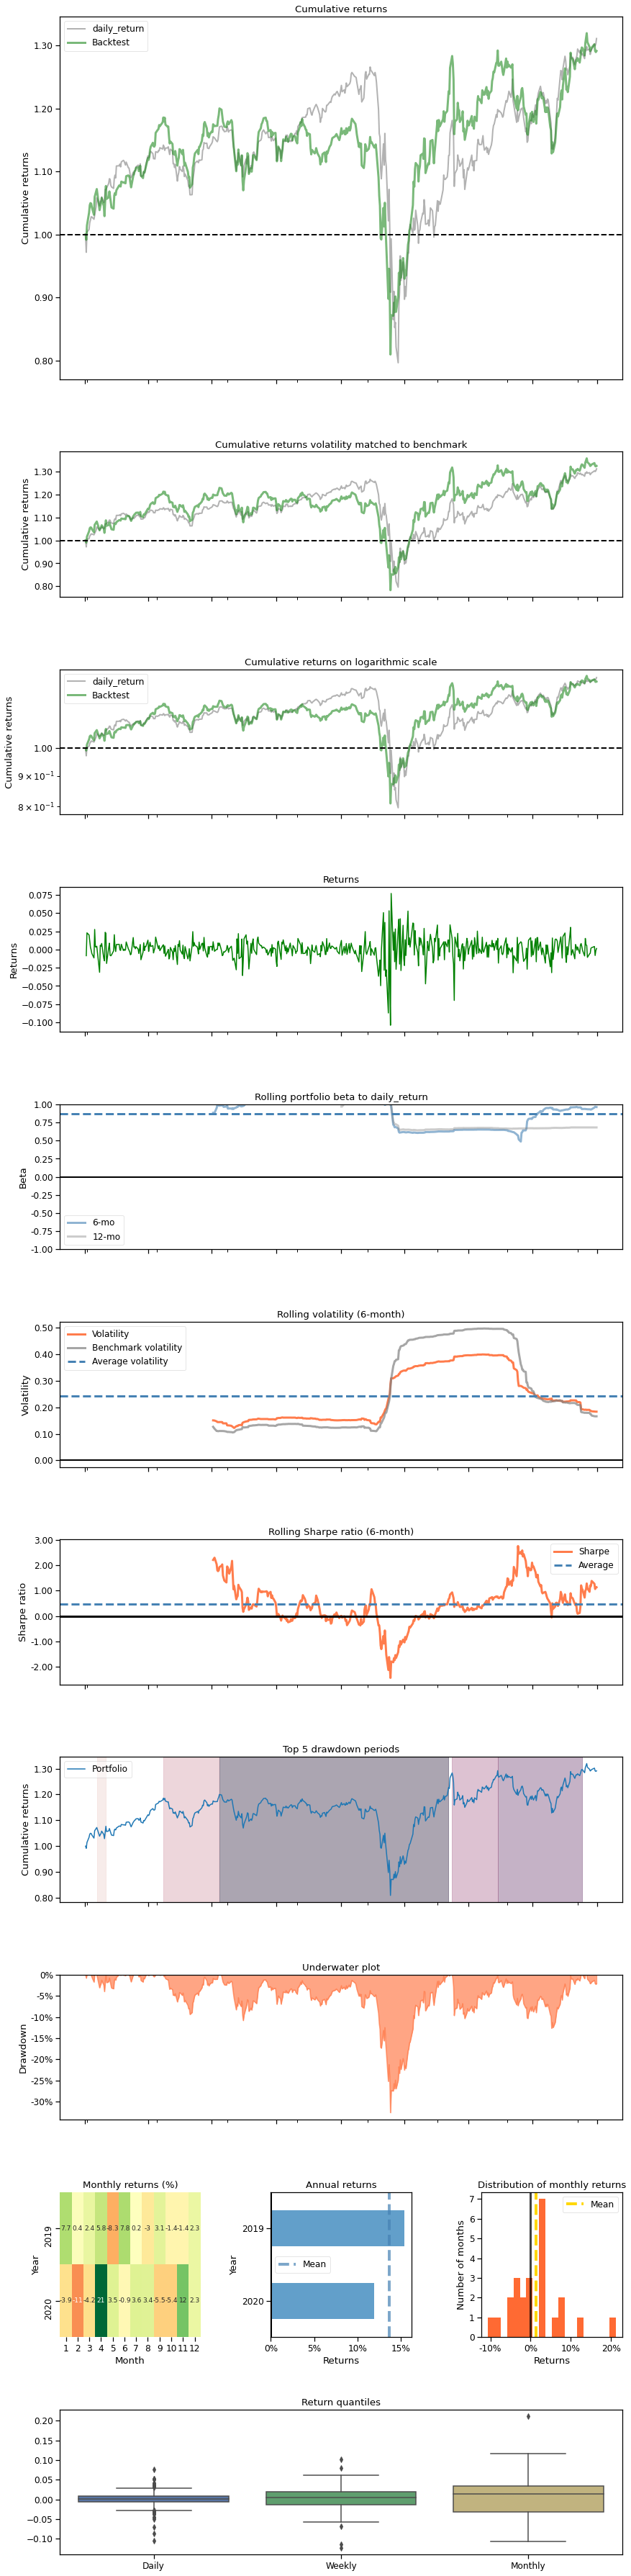

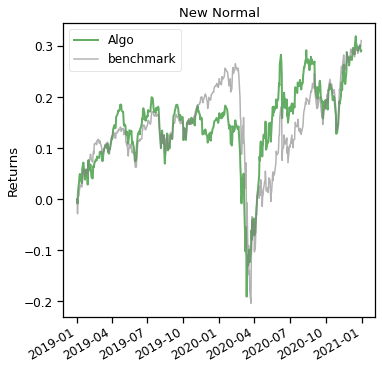

In [37]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = '2019-01-01',
             baseline_end = '2021-01-01')